# Hierarchical clustering


#### Concept: 
Hierarchical clustering is an unsupervised learning algorithm used to build a hierarchy of clusters. It seeks to create a tree of clusters called a dendrogram, which can then be used to decide the level at which to cut the tree to form clusters. There are two main types of hierarchical clustering:

1. Agglomerative Hierarchical Clustering (Bottom-Up):
    - Starts with each data point as a single cluster.
    - Iteratively merges the closest pairs of clusters until all points are in a single cluster or the desired number of clusters is reached.

2. Divisive Hierarchical Clustering (Top-Down):
    - Starts with all data points in a single cluster.
    - Iteratively splits the most heterogeneous cluster until each data point is in its own cluster or the desired number of clusters is reached.

## Linkage Criteria
The choice of how to measure the distance between clusters affects the structure of the dendrogram:
- Single Linkage: Minimum distance between points in two clusters.
- Complete Linkage: Maximum distance between points in two clusters.
- Average Linkage: Average distance between points in two clusters.
- Ward's Method: Minimizes the variance within clusters.

## Implementation Example

Suppose we have a dataset with points in 2D space, and we want to cluster them using hierarchical clustering.


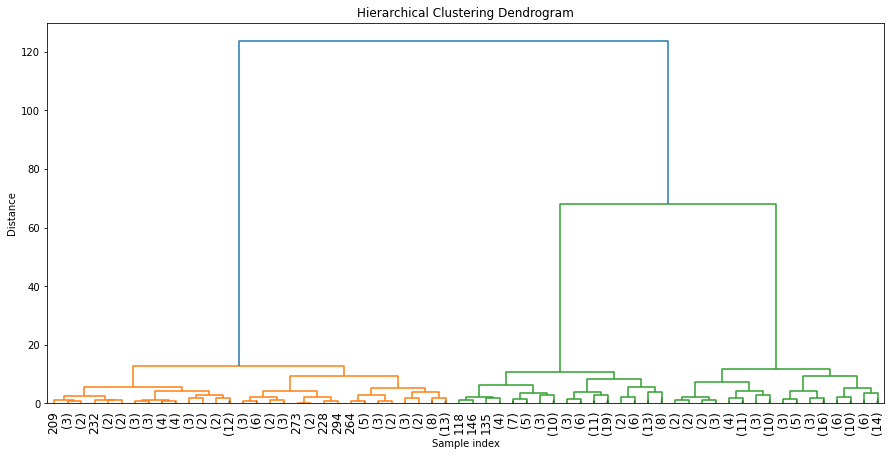

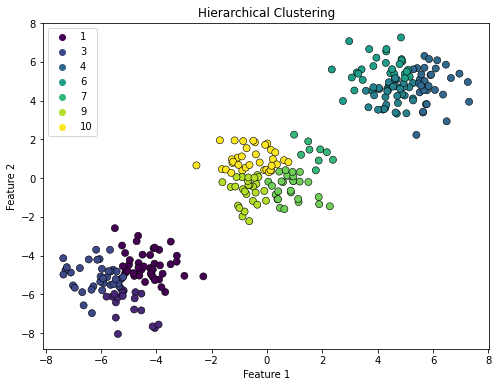

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
np.random.seed(0)
X = np.vstack((np.random.normal(0, 1, (100, 2)),
               np.random.normal(5, 1, (100, 2)),
               np.random.normal(-5, 1, (100, 2))))

# Performing hierarchical clustering
Z = linkage(X, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cutting the dendrogram to form clusters
max_d = 7.0  # Example threshold for cutting the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Clustering')
plt.show()

#### Explanation of the Code

1. Importing Libraries
2. Data Preparation: We generate a synthetic dataset with three clusters using normal distributions.
3. Linkage: We use the linkage function from scipy.cluster.hierarchy to perform hierarchical clustering with Ward's method.
4. Dendrogram: We plot the dendrogram using the dendrogram function to visualize the hierarchical structure.
5. Cutting the Dendrogram: We cut the dendrogram at a specific threshold to form clusters using the fcluster function.
6. Plotting Clusters: We scatter plot the data points with colors indicating the assigned clusters.


#### Choosing the Number of Clusters

The dendrogram helps visualize the hierarchy of clusters. The choice of where to cut the dendrogram (i.e., selecting a threshold distance) determines the number of clusters. This choice can be subjective, but some guidelines include:
- Elbow Method: Similar to k-Means, look for an "elbow" in the dendrogram where the distance between merges increases significantly.
- Maximum Distance: Choose a distance threshold that balances the number of clusters and the compactness of clusters.

#### Applications

Hierarchical clustering is widely used in:
- Gene Expression Data: Grouping similar genes or samples in bioinformatics.
- Document Clustering: Organizing documents into a hierarchical structure.
- Image Segmentation: Dividing an image into regions based on pixel similarity.
